In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

from scipy import stats
from functools import reduce

# Some matplotlib options
%matplotlib inline
matplotlib.style.use("ggplot")



In [4]:
# Read CSV file
data = pd.read_csv("E:/2NDSEM/EDA/JCOMP/DATASET/emp.csv")


In [5]:
#dataset view
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
#header of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#shape of the dataset
data.shape
# Lets see what it looks like
print(data.shape)
before_dedup = data.shape[0]
data.describe(include='all')

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [8]:
# Check for missings
print(np.count_nonzero(data.isnull().values))
print(data.isnull().any())

# Check for duplicates
print(data[data.duplicated(keep=False)].shape)

# Check for conflicting types
data.dtypes

0
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTime

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
# Hate to throw away data but it's only 353 values out of over 23 thousand
data.dropna(axis=0, inplace=True)

# Get rid of all the duplicates
data.drop_duplicates(inplace=True)

# Lets see what it looks like now
print("Duplicates Removed: " + str(before_dedup - data.shape[0]))
data.describe()

Duplicates Removed: 0


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#identify the column which can be removed
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [12]:
data['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

In [13]:
# Remove unnecessary columns
data.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], inplace=True)
data.shape  # Now we have 31 columns only

(1470, 31)

In [14]:
# Convert Columns - Attrition, BusinessTravel, Dept, Gender, MaritalStatus, OverTime
data.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)
data.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)
data.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace=True)
data.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)
data.MaritalStatus.replace({'Single': 0,'Married': 1, 'Divorced': 2}, inplace=True)
data.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)
data.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, inplace=True)
data.JobRole.replace({
    'Sales Executive': 0, 
    'Research Scientist': 1, 
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
}, inplace=True)

In [15]:
#Describe our data and confirm whether changes are reflected
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,0.739456,9.192517,2.912925,1.153741,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.383865,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,1.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploratory Data Analysis

In [16]:
#Identify Difference between mean and median values. [This helps to understand whether columns are skewed or not]
temp = None
temp = pd.DataFrame({
    "Median Values": data.median(), 
    "Mean Values": data.mean(), 
    "Standard Deviation": data.std(),
    "Skewness": data.skew() # Ideal range: -1 to +1
})

# Sort values based on skewness
temp = temp.sort_values(by='Skewness')

temp.head(50)

,Median Values,Mean Values,Standard Deviation,Skewness
WorkLifeBalance,3.0,2.761224,0.706476,-0.552480
JobInvolvement,3.0,2.729932,0.711561,-0.498419
Gender,1.0,0.600000,0.490065,-0.408665
JobSatisfaction,3.0,2.728571,1.102846,-0.329672
EnvironmentSatisfaction,3.0,2.721769,1.093082,-0.321654
RelationshipSatisfaction,3.0,2.712245,1.081209,-0.302828
Education,3.0,2.912925,1.024165,-0.289681
Department,1.0,0.739456,0.527792,-0.172231
HourlyRate,66.0,65.891156,20.329428,-0.032311
DailyRate,802.0,802.485714,403.509100,-0.003519


In [17]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,0.739456,9.192517,2.912925,1.153741,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.383865,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,1.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


0    1233
1     237
Name: Attrition, dtype: int64


0    83.877551
1    16.122449
Name: Attrition, dtype: float64

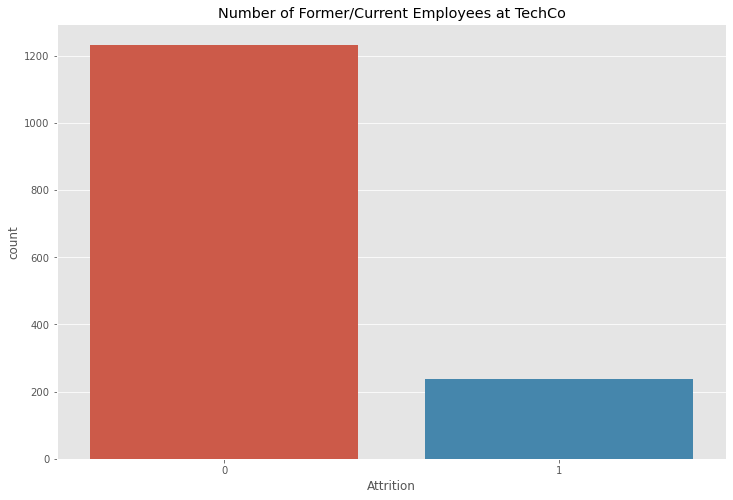

In [18]:
#who leaves techco
print(data.Attrition.value_counts())

# Easier to join all leaver together for my analyses considering there are very few terminations
data['Attrition'] = data['Attrition'].replace("Termination", "Voluntary Resignation")
data['Attrition'] = data['Attrition'].replace("Voluntary Resignation", "Former Employees")
data['Attrition'] = data['Attrition'].replace("Current employee", "Current Employees")

plt.figure(figsize=(12,8))
plt.title('Number of Former/Current Employees at TechCo')
sns.countplot(x="Attrition", data=data)
data['Attrition'].value_counts()/data['Attrition'].count()*100

Percentage of NO Values: 83.87755102040816
Percentage of YES Values: 16.122448979591837


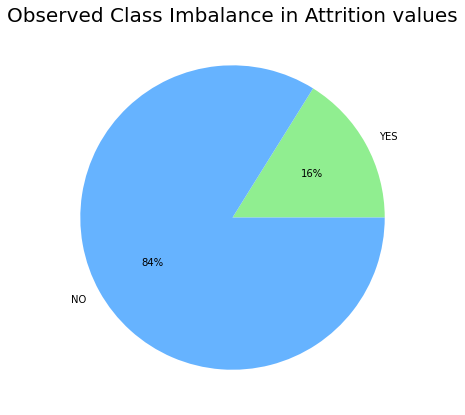

In [19]:
#Let us identify whether our target variable is biased or not. If yes, then by how much

total_rows = data.shape[0]
no_val = data.Attrition.value_counts()[0]
yes_val = data.Attrition.value_counts()[1]
print('Percentage of NO Values: ' + str((no_val/total_rows) * 100))
print('Percentage of YES Values: ' + str((yes_val/total_rows) * 100))

plt.figure(figsize = (7, 7))
plt.pie([yes_val, no_val], labels=['YES', 'NO'], autopct='%1.0f%%', colors = ['lightgreen','#66b3ff'])
plt.title("Observed Class Imbalance in Attrition values", fontsize=20)
plt.show()

1    882
0    588
Name: Gender, dtype: int64


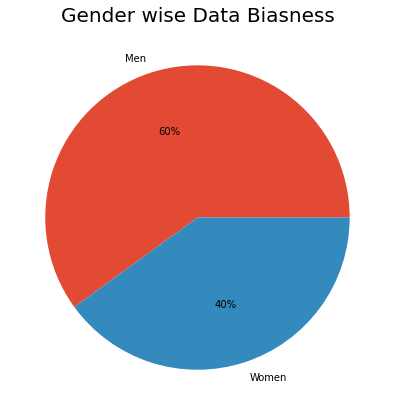

In [20]:
#Let us identify whether our dataset is gender biased or not. If yes, then by how much
print(data.Gender.value_counts())

total = data.Gender.value_counts()[0] + data.Gender.value_counts()[1]
per_men_data = (data.Gender.value_counts()[1] / total) * 100 
per_women_data = (data.Gender.value_counts()[0] / total) * 100 

plt.figure(figsize = (7, 7))
plt.pie([per_men_data, per_women_data], labels=['Men', 'Women'], autopct='%1.0f%%')
plt.title('Gender wise Data Biasness', fontsize=20)
plt.show()

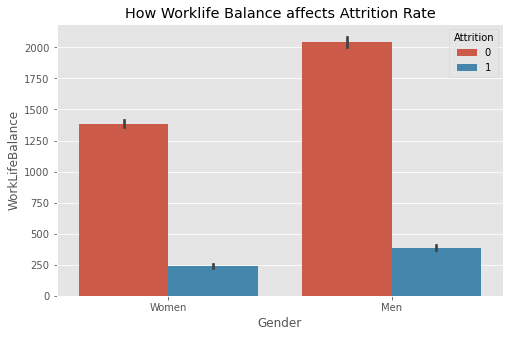

In [21]:
#Women are not willing to switch jobs more often as men do. Also, their work-life balance is very low as compared to men.
plt.figure(figsize=(8, 5))
ax = sns.barplot(x = data.Gender , y = data.WorkLifeBalance, estimator = np.sum, hue = data.Attrition)
ax.set_xticklabels(('Women', 'Men'))
plt.title('How Worklife Balance affects Attrition Rate')
plt.show()

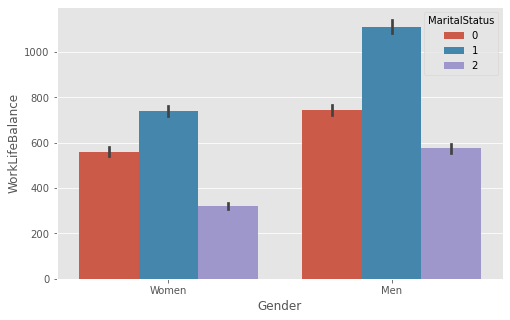

In [22]:
#Married people have a maximum Work-Life Balance rate than others

plt.figure(figsize=(8, 5))
ax = sns.barplot(x = data.Gender , y = data.WorkLifeBalance, estimator = np.sum, hue = data.MaritalStatus)
ax.set_xticklabels(('Women', 'Men'))
plt.show()

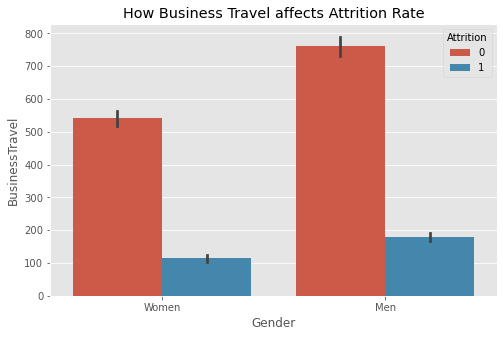

In [23]:
#More men do Business Travels than women. Also, as seen above their Work-Life Balance is higher than women

plt.figure(figsize=(8, 5))
ax = sns.barplot(x = data.Gender , y = data.BusinessTravel, estimator = np.sum, hue = data.Attrition)
ax.set_xticklabels(('Women', 'Men'))
plt.title('How Business Travel affects Attrition Rate')
plt.show()

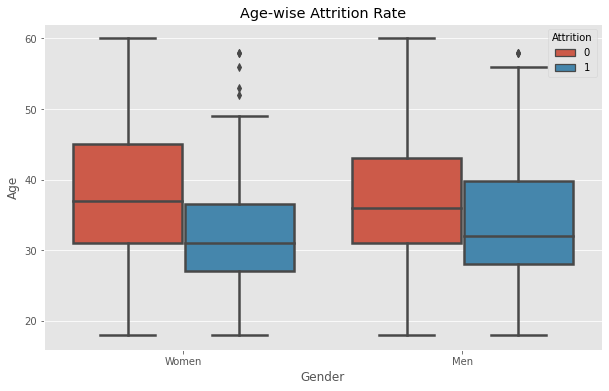

In [24]:
#age affect artition
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=data.Gender, y=data.Age, hue=data.Attrition, data=data, linewidth=2.5)
ax.set_xticklabels(('Women', 'Men'))
plt.title('Age-wise Attrition Rate')
plt.show()

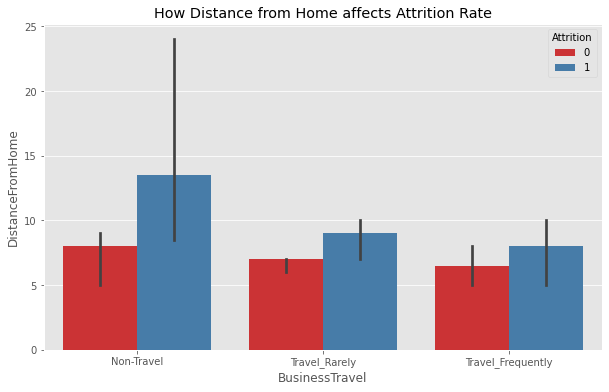

In [25]:
#Atttition Rate is higher in Non-Travellers who stay far from office

plt.figure(figsize=(10, 6))
plt.title('How Distance from Home affects Attrition Rate')
ax = sns.barplot(x = data.BusinessTravel , y = data.DistanceFromHome, estimator = np.median, hue = data.Attrition, palette='Set1')
ax.set_xticklabels(('Non-Travel', 'Travel_Rarely', 'Travel_Frequently'))
plt.show()

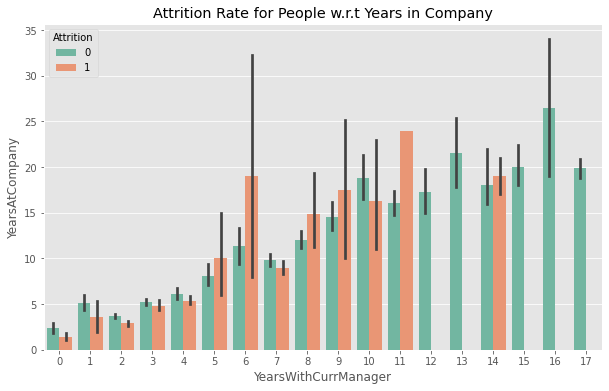

In [26]:
# switching job to other
plt.figure(figsize=(10, 6))
plt.title('Attrition Rate for People w.r.t Years in Company')
ax = sns.barplot(x=data.YearsWithCurrManager, y=data.YearsAtCompany, hue=data.Attrition, orient='v', palette='Set2')
plt.show()

# hypothesis testing

In [27]:
# Make a new dataframe and get its preview
new_data = pd.DataFrame({'Age': data['Age'], 'Job Level': data['JobLevel'], 'Job Role': data['JobRole'], 'Attrition': data['Attrition']})
new_data.head()

,Age,Job Level,Job Role,Attrition
0,41,2,0,1
1,49,2,1,0
2,37,1,2,1
3,33,1,1,0
4,27,1,2,0


In [28]:
# Transform non-numeric columns into numerical columns
import numpy as np
from sklearn.preprocessing import LabelEncoder

for column in new_data.columns:
        if new_data[column].dtype == np.number:
            continue
        new_data[column] = LabelEncoder().fit_transform(new_data[column])

In [29]:
new_data.head()

,Age,Job Level,Job Role,Attrition
0,23,1,0,1
1,31,1,1,0
2,19,0,2,1
3,15,0,1,0
4,9,0,2,0


In [30]:
# Get the correlation table
new_data.corr()

,Age,Job Level,Job Role,Attrition
Age,1.000000,0.509604,0.159715,-0.159205
Job Level,0.509604,1.000000,0.313588,-0.169105
Job Role,0.159715,0.313588,1.000000,-0.027930
Attrition,-0.159205,-0.169105,-0.027930,1.000000


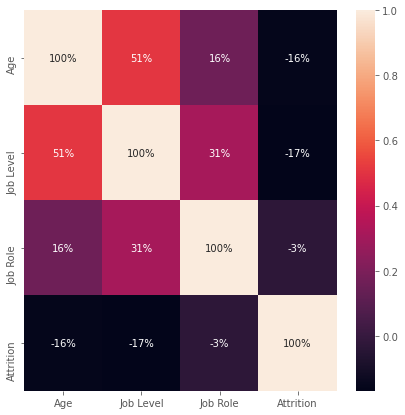

In [31]:
# Visualize the correlation
plt.figure(figsize=(7,7))
sns.heatmap(new_data.corr(), annot=True, fmt='.0%')

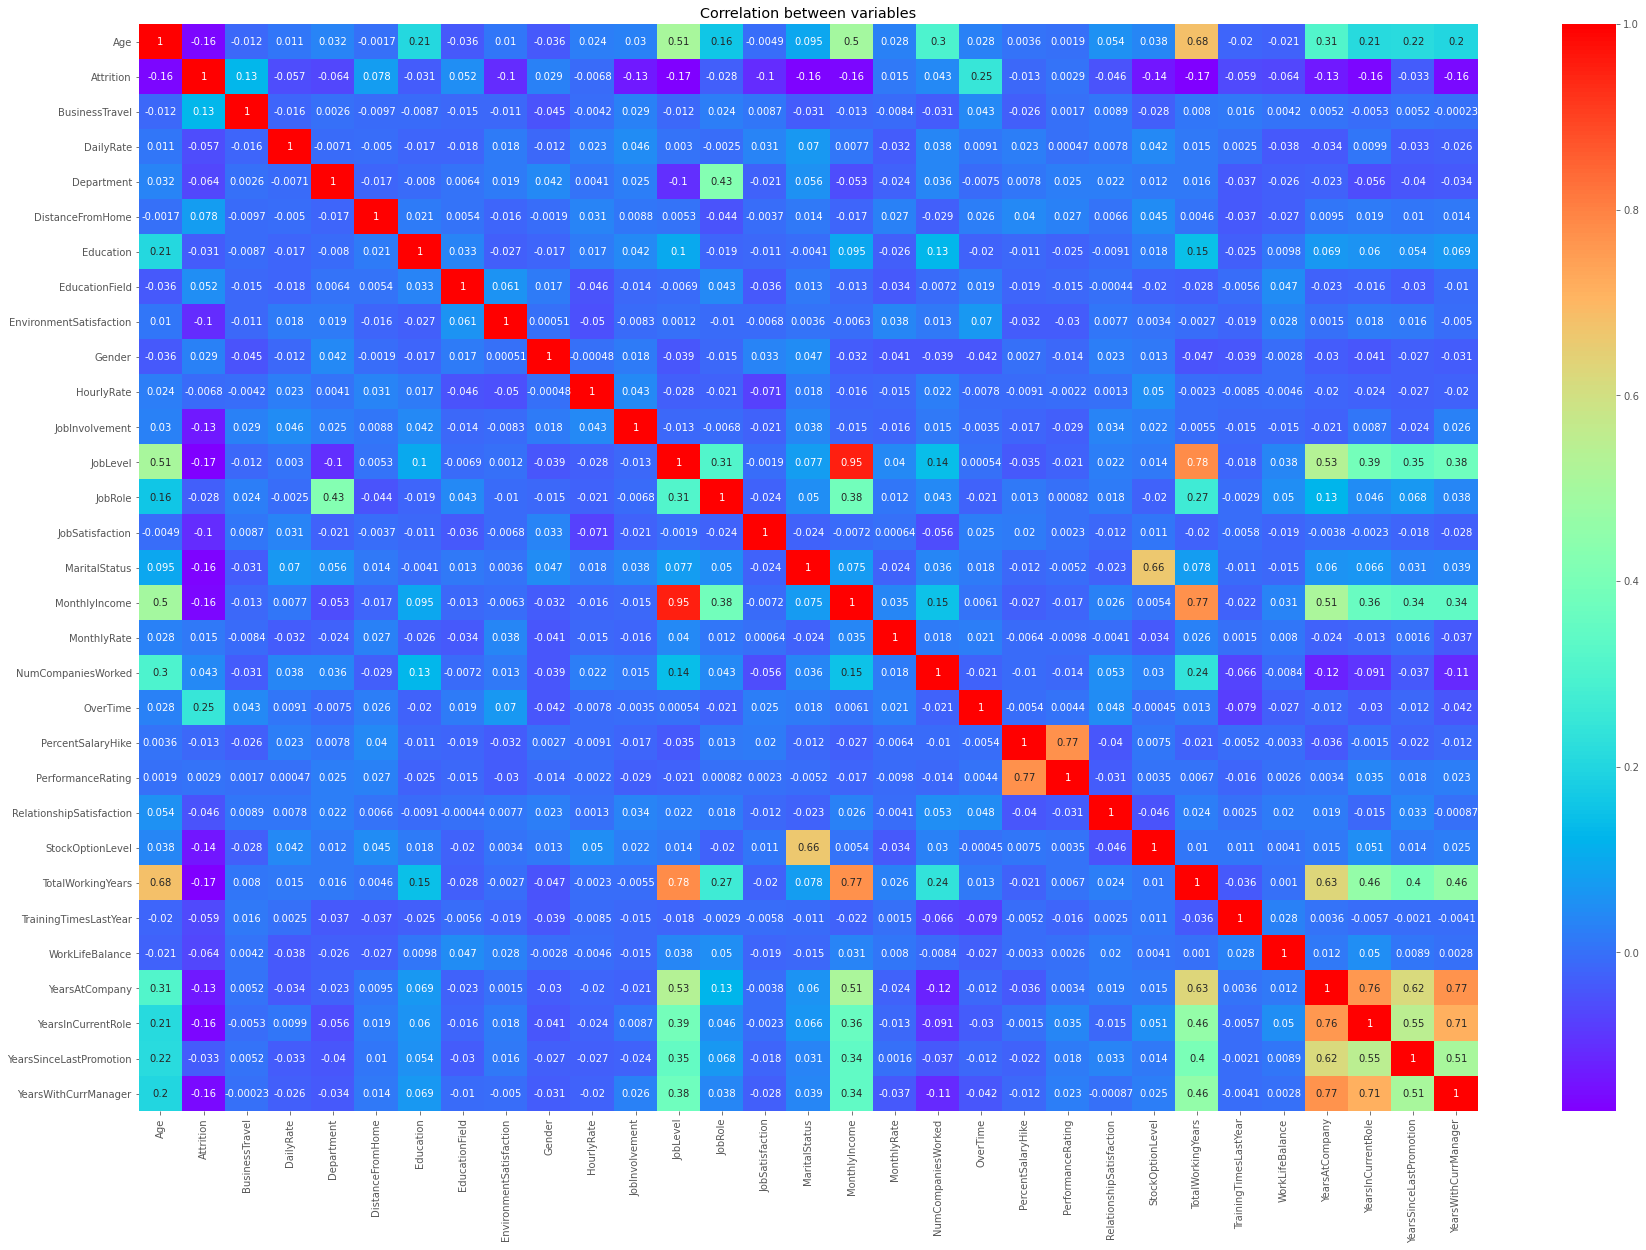

In [32]:
#Identifying Correlation furthermore using Correlation plot
plt.figure(figsize=(30, 20))
plt.title('Correlation between variables')
sns.heatmap(data.corr(), annot=True, cmap='rainbow')

In [33]:
#Building a Predictive Classification Model

In [34]:
at = pd.read_csv("E:/2NDSEM/EDA/JCOMP/DATASET/emp.csv")
#use only when required 
at.Attrition.replace({"Yes":1 , "No":0} , inplace=True)
#labeled to numerical
le=LabelEncoder()
at[at.select_dtypes(include=['object']).columns]  = at[at.select_dtypes(include=['object']).columns].apply(le.fit_transform)
#columns to be dropped
at.drop(['Over18' , 'StandardHours' ,'EmployeeCount','EmployeeNumber' ] , inplace=True , axis=1)

In [35]:
#removing Outliers in monthly income column 
def remove_outliers(df , col , k):
    mean= df[col].mean()
    sd=df[col].std()
    global df1
    final_list = [x for x in df[col] if (x>mean-k*sd)]
    final_list = [x for x in final_list if (x<mean+k*sd)]
    df1 = df.loc[df[col].isin(final_list)];
    return df1
at =remove_outliers(at , 'MonthlyIncome' ,2.5)

In [37]:
#sampling
from sklearn.model_selection import train_test_split
at_train , at_test = train_test_split(at , test_size=0.2 , random_state=6)
at_train[at_train.Attrition ==1].shape
at_train_x = at_train.drop(['Attrition'] , axis=1 )
at_train_y = at_train.Attrition
at_test_x = at_test.drop(['Attrition'] , axis=1)
at_test_y = at_test.Attrition
#upsampling-class-1
df1 = at_train[at_train.Attrition == 1]
at_train = pd.concat([at_train,df1,df1,df1,df1] , axis=0 )
at_train_x = at_train.drop(['Attrition'] , axis=1 )
at_train_y = at_train.Attrition

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
#downSamling for Class 0 - Use if Necessary 
df3=  at_train[at_train.Attrition==0].iloc[1:800,:]
df4=  at_train[at_train.Attrition == 1]
at_train = pd.concat([df3 , df4] , axis=0)
at_train_x = at_train.drop(['Attrition'] , axis=1 )
at_train_y = at_train.Attrition

In [40]:
#Random Forest with adaptive Boosting
rfc = RandomForestClassifier(n_estimators=500  , criterion='entropy' , max_depth=3)
adc = AdaBoostClassifier(rfc)
adc.fit(at_train_x , at_train_y)
pred_test_arf = adc.predict(at_test_x)




#confution Matrix
tab_arf = confusion_matrix(pred_test_arf , at_test_y)
print(tab_arf)

#Full Classification Report
report = classification_report(at_test_y , pred_test_arf)
print(report)

#Accuracy 
accuracy_rfa = np.sum(np.diag(tab_arf))*100/np.sum(tab_arf)
print("Accuracy_rf with adb :" , accuracy_rfa)

[[214  18]
 [ 19  31]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       233
           1       0.62      0.63      0.63        49

    accuracy                           0.87       282
   macro avg       0.77      0.78      0.77       282
weighted avg       0.87      0.87      0.87       282

Accuracy_rf with adb : 86.87943262411348


In [41]:
#Checking the Feature Importance 
feature_importance = pd.DataFrame({"Feature " : at_train_x.columns , "Importance": adc.feature_importances_})
feature_importance.sort_values(['Importance'] , ascending=False)

,Feature,Importance
15,MonthlyIncome,0.093025
2,DailyRate,0.069046
0,Age,0.056993
16,MonthlyRate,0.055160
9,HourlyRate,0.044151
12,JobRole,0.041066
18,OverTime,0.040714
4,DistanceFromHome,0.038653
29,YearsWithCurrManager,0.038145
26,YearsAtCompany,0.037540


In [42]:
rfc = RandomForestClassifier(n_estimators=600  , criterion='entropy' , max_depth=5)
rfc.fit(at_train_x , at_train_y)
pred_test_rf = rfc.predict(at_test_x)



tab1 = confusion_matrix(pred_test_rf , at_test_y)
print(tab1)


report = classification_report(at_test_y , pred_test_rf)
print(report)


accuracy_rf = accuracy_score(pred_test_rf , at_test_y)
print("Accuracy_rf :" , accuracy_rf*100)

[[198  15]
 [ 35  34]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       233
           1       0.49      0.69      0.58        49

    accuracy                           0.82       282
   macro avg       0.71      0.77      0.73       282
weighted avg       0.85      0.82      0.83       282

Accuracy_rf : 82.26950354609929
